# Setup

In [1]:
# check GPU
!nvidia-smi

Sat Jan 14 19:21:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# pulls repo to colab
!git clone https://github.com/char-tan/mode_connectivity.git

# checkout specific branch if needed
!cd mode_connectivity; git checkout main

Cloning into 'mode_connectivity'...
remote: Enumerating objects: 1002, done.
remote: Counting objects: 100% (289/289), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 1002 (delta 188), reused 211 (delta 170), pack-reused 713
Receiving objects: 100% (1002/1002), 38.23 MiB | 9.42 MiB/s, done.
Resolving deltas: 100% (591/591), done.
Already on 'main'
Your branch is up to date with 'origin/main'.


In [3]:
# allows you to change the .py files and have the imports updated
%load_ext autoreload
%autoreload 2

In [4]:
import sys, os
SCRIPT_DIR = os.path.dirname(os.path.abspath('.'))
sys.path.append(os.path.dirname(SCRIPT_DIR))

sys.path.append("mode_connectivity")

from mode_connectivity.training import *
from mode_connectivity.lmc import *
from mode_connectivity.training_config import *

from mode_connectivity.models.mlp import MLP
from mode_connectivity.models.vgg import VGG
from mode_connectivity.models.resnet import ResNet

from mode_connectivity.utils import weight_matching, data, training_utils, plot, utils

import torch
from torchvision import transforms
import copy
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

# Training

In [6]:
training_config = MLP_MNIST_DEFAULT
training_config.epochs = 10
training_config.seed = 7

# train model a
model_a = train_model(*setup_train(training_config), verbose = 1)
torch.save(model_a.state_dict(), 'model_a.pt')

# change seed to get different model
training_config.seed = 42

# train model b
model_b = train_model(*setup_train(training_config), verbose = 1)
torch.save(model_b.state_dict(), 'model_b.pt')  

Train Epoch: 1, Train Accuracy: (90%) 
Average loss: 0.1301, Accuracy: (96%)
Train Epoch: 2, Train Accuracy: (97%) 
Average loss: 0.0942, Accuracy: (97%)
Train Epoch: 3, Train Accuracy: (98%) 
Average loss: 0.0708, Accuracy: (98%)
Train Epoch: 4, Train Accuracy: (99%) 
Average loss: 0.0864, Accuracy: (97%)
Train Epoch: 5, Train Accuracy: (99%) 
Average loss: 0.0811, Accuracy: (97%)
Train Epoch: 6, Train Accuracy: (99%) 
Average loss: 0.0794, Accuracy: (98%)
Train Epoch: 7, Train Accuracy: (99%) 
Average loss: 0.0721, Accuracy: (98%)
Train Epoch: 8, Train Accuracy: (99%) 
Average loss: 0.0732, Accuracy: (98%)
Train Epoch: 9, Train Accuracy: (99%) 
Average loss: 0.0811, Accuracy: (98%)
Train Epoch: 10, Train Accuracy: (99%) 
Average loss: 0.0778, Accuracy: (98%)
Train Epoch: 1, Train Accuracy: (90%) 
Average loss: 0.1392, Accuracy: (96%)
Train Epoch: 2, Train Accuracy: (97%) 
Average loss: 0.0911, Accuracy: (97%)
Train Epoch: 3, Train Accuracy: (98%) 
Average loss: 0.0784, Accuracy: (98%

# LMC

In [10]:
# n_points = 20
# (
#     permuted_params,
#     train_acc_naive,
#     test_acc_naive,
#     train_acc_perm,
#     test_acc_perm,
# ) = linear_mode_connect(
#     MLP, "model_a.pt", "model_b.pt", "mnist", n_points=n_points, verbose=2
# )

print(train_acc_naive)
print(test_acc_naive)
print(train_acc_perm)
print(test_acc_perm)


performing naive interpolation


  0%|          | 0/20 [00:00<?, ?it/s]

Average loss: 0.0121, Accuracy: (100%)


  5%|▌         | 1/20 [00:11<03:46, 11.91s/it]

Average loss: 0.0778, Accuracy: (98%)
point 1/20. lam = 0.0, train loss = 0.012114213720957438, test loss = 0.07779785842895508
Average loss: 0.0150, Accuracy: (100%)


 10%|█         | 2/20 [00:23<03:33, 11.88s/it]

Average loss: 0.0684, Accuracy: (98%)
point 2/20. lam = 0.05263157933950424, train loss = 0.014956254736582438, test loss = 0.06838651275634766
Average loss: 0.0232, Accuracy: (100%)


 15%|█▌        | 3/20 [00:35<03:20, 11.79s/it]

Average loss: 0.0670, Accuracy: (98%)
point 3/20. lam = 0.10526315867900848, train loss = 0.02323101234436035, test loss = 0.06699419250488281
Average loss: 0.0448, Accuracy: (99%)


 20%|██        | 4/20 [00:47<03:07, 11.75s/it]

Average loss: 0.0804, Accuracy: (98%)
point 4/20. lam = 0.15789473056793213, train loss = 0.044757090504964195, test loss = 0.0803874481201172
Average loss: 0.0985, Accuracy: (99%)


 25%|██▌       | 5/20 [00:58<02:56, 11.75s/it]

Average loss: 0.1266, Accuracy: (98%)
point 5/20. lam = 0.21052631735801697, train loss = 0.09851376139322916, test loss = 0.12657018890380858
Average loss: 0.2202, Accuracy: (99%)


 30%|███       | 6/20 [01:10<02:44, 11.75s/it]

Average loss: 0.2408, Accuracy: (97%)
point 6/20. lam = 0.2631579041481018, train loss = 0.2202243398030599, test loss = 0.24077186584472657
Average loss: 0.4465, Accuracy: (98%)


 35%|███▌      | 7/20 [01:23<02:36, 12.00s/it]

Average loss: 0.4606, Accuracy: (97%)
point 7/20. lam = 0.31578946113586426, train loss = 0.44651542561848956, test loss = 0.4605854370117187
Average loss: 0.7642, Accuracy: (97%)


 40%|████      | 8/20 [01:34<02:22, 11.87s/it]

Average loss: 0.7732, Accuracy: (96%)
point 8/20. lam = 0.3684210479259491, train loss = 0.7641924641927084, test loss = 0.7732403686523438
Average loss: 1.0804, Accuracy: (94%)


 45%|████▌     | 9/20 [01:46<02:08, 11.71s/it]

Average loss: 1.0851, Accuracy: (93%)
point 9/20. lam = 0.42105263471603394, train loss = 1.0804134114583333, test loss = 1.0851455932617187
Average loss: 1.2716, Accuracy: (90%)


 50%|█████     | 10/20 [01:57<01:56, 11.64s/it]

Average loss: 1.2729, Accuracy: (89%)
point 10/20. lam = 0.4736842215061188, train loss = 1.2715779174804687, test loss = 1.2729312255859375
Average loss: 1.2538, Accuracy: (91%)


 55%|█████▌    | 11/20 [02:09<01:44, 11.60s/it]

Average loss: 1.2540, Accuracy: (91%)
point 11/20. lam = 0.5263158082962036, train loss = 1.2538445841471355, test loss = 1.2540463623046876
Average loss: 1.0333, Accuracy: (95%)


 60%|██████    | 12/20 [02:20<01:32, 11.61s/it]

Average loss: 1.0365, Accuracy: (94%)
point 12/20. lam = 0.5789473652839661, train loss = 1.0333264892578125, test loss = 1.0365122314453126
Average loss: 0.7021, Accuracy: (97%)


 65%|██████▌   | 13/20 [02:32<01:20, 11.52s/it]

Average loss: 0.7127, Accuracy: (96%)
point 13/20. lam = 0.6315789222717285, train loss = 0.7020847717285156, test loss = 0.7126624145507813
Average loss: 0.3915, Accuracy: (98%)


 70%|███████   | 14/20 [02:43<01:08, 11.48s/it]

Average loss: 0.4115, Accuracy: (97%)
point 14/20. lam = 0.6842105388641357, train loss = 0.3915018341064453, test loss = 0.41147821655273437
Average loss: 0.1862, Accuracy: (99%)


 75%|███████▌  | 15/20 [02:54<00:57, 11.46s/it]

Average loss: 0.2147, Accuracy: (97%)
point 15/20. lam = 0.7368420958518982, train loss = 0.18615200449625652, test loss = 0.21473290405273437
Average loss: 0.0828, Accuracy: (99%)


 80%|████████  | 16/20 [03:06<00:46, 11.54s/it]

Average loss: 0.1183, Accuracy: (98%)
point 16/20. lam = 0.7894736528396606, train loss = 0.08277079442342122, test loss = 0.11825478820800782
Average loss: 0.0389, Accuracy: (99%)


 85%|████████▌ | 17/20 [03:18<00:34, 11.51s/it]

Average loss: 0.0810, Accuracy: (98%)
point 17/20. lam = 0.8421052694320679, train loss = 0.03894484977722168, test loss = 0.08095183639526367
Average loss: 0.0220, Accuracy: (99%)


 90%|█████████ | 18/20 [03:29<00:23, 11.53s/it]

Average loss: 0.0715, Accuracy: (98%)
point 18/20. lam = 0.8947368264198303, train loss = 0.02195169868469238, test loss = 0.07153456954956054
Average loss: 0.0162, Accuracy: (99%)


 95%|█████████▌| 19/20 [03:41<00:11, 11.51s/it]

Average loss: 0.0750, Accuracy: (98%)
point 19/20. lam = 0.9473684430122375, train loss = 0.016154358037312827, test loss = 0.07502334365844726
Average loss: 0.0156, Accuracy: (99%)


100%|██████████| 20/20 [03:52<00:00, 11.63s/it]

Average loss: 0.0868, Accuracy: (98%)
point 20/20. lam = 1.0, train loss = 0.015551488049825032, test loss = 0.08681171035766602

permuting model
iteration 0 P_1: progress 55.32993698120117
iteration 0 P_2: progress 19.304779052734375
iteration 0 P_0: progress 115.89991760253906
iteration 1 P_0: progress 0.0
iteration 1 P_2: progress 0.0


iteration 1 P_1: progress 52.476524353027344
iteration 2 P_1: progress 0.0
iteration 2 P_0: progress 7.0185546875
iteration 2 P_2: progress 28.850433349609375
iteration 3 P_0: progress 0.0
iteration 3 P_2: progress 0.0
iteration 3 P_1: progress 8.782196044921875
iteration 4 P_0: progress 1.232208251953125
iteration 4 P_1: progress 0.5490570068359375
iteration 4 P_2: progress 6.74786376953125
iteration 5 P_0: progress 0.1798553466796875
iteration 5 P_1: progress 0.729339599609375
iteration 5 P_2: progress 0.8659744262695312
iteration 6 P_2: progress 0.0
iteration 6 P_1: progress 0.193634033203125
iteration 6 P_0: progress 0.215057373046875
iteration 7 P_0: progress 0.0
iteration 7 P_1: progress 0.0587615966796875
iteration 7 P_2: progress 0.4488983154296875
iteration 8 P_0: progress 0.01470947265625
iteration 8 P_1: progress 0.023895263671875
iteration 8 P_2: progress 0.1148681640625
iteration 9 P_2: progress 0.0
iteration 9 P_0: progress 0.0032196044921875
iteration 9 P_1: progress 0.0

  0%|          | 0/20 [00:00<?, ?it/s]

Average loss: 0.0121, Accuracy: (100%)


  5%|▌         | 1/20 [00:12<03:49, 12.07s/it]

Average loss: 0.0778, Accuracy: (98%)
point 1/20. lam = 0.0, train loss = 0.012114213720957438, test loss = 0.07779785842895508
Average loss: 0.0113, Accuracy: (100%)


 10%|█         | 2/20 [00:23<03:31, 11.76s/it]

Average loss: 0.0719, Accuracy: (98%)
point 2/20. lam = 0.05263157933950424, train loss = 0.011288798554738362, test loss = 0.07193320846557617
Average loss: 0.0110, Accuracy: (100%)


 15%|█▌        | 3/20 [00:35<03:17, 11.63s/it]

Average loss: 0.0673, Accuracy: (98%)
point 3/20. lam = 0.10526315867900848, train loss = 0.011020974445343017, test loss = 0.06730995788574219
Average loss: 0.0112, Accuracy: (100%)


 20%|██        | 4/20 [00:46<03:03, 11.48s/it]

Average loss: 0.0638, Accuracy: (98%)
point 4/20. lam = 0.15789473056793213, train loss = 0.011239524332682292, test loss = 0.06379631881713867
Average loss: 0.0119, Accuracy: (100%)


 25%|██▌       | 5/20 [00:57<02:50, 11.37s/it]

Average loss: 0.0614, Accuracy: (98%)
point 5/20. lam = 0.21052631735801697, train loss = 0.011862649917602539, test loss = 0.06137152709960938
Average loss: 0.0128, Accuracy: (100%)


 30%|███       | 6/20 [01:08<02:37, 11.27s/it]

Average loss: 0.0598, Accuracy: (98%)
point 6/20. lam = 0.2631579041481018, train loss = 0.012767449760437012, test loss = 0.059836766815185544
Average loss: 0.0138, Accuracy: (100%)


 35%|███▌      | 7/20 [01:20<02:27, 11.34s/it]

Average loss: 0.0590, Accuracy: (98%)
point 7/20. lam = 0.31578946113586426, train loss = 0.013800198332468669, test loss = 0.059042738342285156
Average loss: 0.0148, Accuracy: (100%)


 40%|████      | 8/20 [01:31<02:16, 11.41s/it]

Average loss: 0.0588, Accuracy: (98%)
point 8/20. lam = 0.3684210479259491, train loss = 0.014779967180887858, test loss = 0.05878398742675781
Average loss: 0.0155, Accuracy: (100%)


 45%|████▌     | 9/20 [01:43<02:06, 11.49s/it]

Average loss: 0.0590, Accuracy: (98%)
point 9/20. lam = 0.42105263471603394, train loss = 0.015541853141784669, test loss = 0.058991439056396484
Average loss: 0.0159, Accuracy: (100%)


 50%|█████     | 10/20 [01:54<01:55, 11.55s/it]

Average loss: 0.0594, Accuracy: (98%)
point 10/20. lam = 0.4736842215061188, train loss = 0.015948631540934243, test loss = 0.059381369781494144
Average loss: 0.0159, Accuracy: (100%)


 55%|█████▌    | 11/20 [02:06<01:44, 11.62s/it]

Average loss: 0.0599, Accuracy: (98%)
point 11/20. lam = 0.5263158082962036, train loss = 0.01589630610148112, test loss = 0.05985619277954102
Average loss: 0.0154, Accuracy: (100%)


 60%|██████    | 12/20 [02:18<01:33, 11.63s/it]

Average loss: 0.0604, Accuracy: (98%)
point 12/20. lam = 0.5789473652839661, train loss = 0.015397860018412273, test loss = 0.060420584869384765
Average loss: 0.0146, Accuracy: (100%)


 65%|██████▌   | 13/20 [02:29<01:21, 11.62s/it]

Average loss: 0.0610, Accuracy: (98%)
point 13/20. lam = 0.6315789222717285, train loss = 0.01456061134338379, test loss = 0.061039244842529296
Average loss: 0.0136, Accuracy: (100%)


 70%|███████   | 14/20 [02:41<01:09, 11.61s/it]

Average loss: 0.0619, Accuracy: (98%)
point 14/20. lam = 0.6842105388641357, train loss = 0.01357810427347819, test loss = 0.06191634521484375
Average loss: 0.0127, Accuracy: (100%)


 75%|███████▌  | 15/20 [02:53<00:58, 11.78s/it]

Average loss: 0.0633, Accuracy: (98%)
point 15/20. lam = 0.7368420958518982, train loss = 0.012667367394765218, test loss = 0.06329855041503907
Average loss: 0.0120, Accuracy: (100%)


 80%|████████  | 16/20 [03:05<00:47, 11.76s/it]

Average loss: 0.0654, Accuracy: (98%)
point 16/20. lam = 0.7894736528396606, train loss = 0.012014726924896241, test loss = 0.06539159927368164
Average loss: 0.0118, Accuracy: (100%)


 85%|████████▌ | 17/20 [03:17<00:35, 11.76s/it]

Average loss: 0.0684, Accuracy: (98%)
point 17/20. lam = 0.8421052694320679, train loss = 0.011773567644755045, test loss = 0.06842026138305664
Average loss: 0.0121, Accuracy: (100%)


 90%|█████████ | 18/20 [03:29<00:23, 11.77s/it]

Average loss: 0.0728, Accuracy: (98%)
point 18/20. lam = 0.8947368264198303, train loss = 0.012117343425750732, test loss = 0.07279180603027344
Average loss: 0.0133, Accuracy: (100%)


 95%|█████████▌| 19/20 [03:40<00:11, 11.78s/it]

Average loss: 0.0788, Accuracy: (98%)
point 19/20. lam = 0.9473684430122375, train loss = 0.013273764769236246, test loss = 0.07879379043579102
Average loss: 0.0156, Accuracy: (99%)


100%|██████████| 20/20 [03:52<00:00, 11.64s/it]

Average loss: 0.0868, Accuracy: (98%)
point 20/20. lam = 1.0, train loss = 0.015551488176981609, test loss = 0.08681171264648438
[99.57666666666667, 99.54166666666667, 99.51166666666667, 99.41333333333333, 99.23166666666667, 98.935, 98.31833333333333, 96.91166666666666, 93.94166666666666, 90.36666666666666, 91.08666666666667, 94.765, 97.12333333333333, 98.33166666666666, 98.94166666666666, 99.25833333333334, 99.425, 99.48166666666667, 99.49166666666666, 99.48666666666666]
[97.94, 97.97, 97.9, 97.91, 97.74, 97.45, 96.97, 95.75, 92.81, 89.43, 90.6, 93.71, 95.74, 96.82, 97.28, 97.52, 97.63, 97.79, 97.88, 97.93]
[99.57666666666667, 99.54166666666667, 99.51166666666667, 99.41333333333333, 99.23166666666667, 98.935, 98.31833333333333, 96.91166666666666, 93.94166666666666, 90.36666666666666, 91.08666666666667, 94.765, 97.12333333333333, 98.33166666666666, 98.94166666666666, 99.25833333333334, 99.425, 99.48166666666667, 99.49166666666666, 99.48666666666666]
[97.94, 97.97, 97.9, 97.91, 97.74, 9

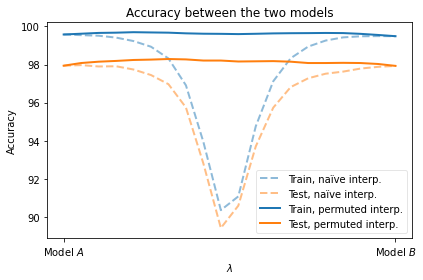

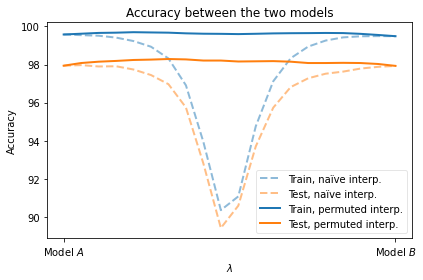

In [11]:
# First we do the basic linear interpolation plot
lambdas = torch.linspace(0, 1, steps=n_points)
plot.plot_interp_metric("accuracy", lambdas, train_acc_naive, test_acc_naive, train_acc_perm, test_acc_perm)

In [13]:
# Now we generate the contour plot
a_params = torch.load("model_a.pt") 
b_params = torch.load("model_b.pt") 
v1, v2, v3 = (
    utils.state_dict_to_numpy_array(p) for p in [a_params, b_params, permuted_params]
)
contour_plane = utils.generate_orthogonal_basis(v1, v2, v3)
train_loader, test_loader = data.get_data_loaders(
    dataset="mnist", train_kwargs={"batch_size":512}, test_kwargs={"batch_size":512}
)
device, _ = get_device()
(
    t1s,
    t2s,
    test_acc_grid,
    test_loss_grid,
    train_acc_grid,
    train_loss_grid,
) = utils.generate_loss_landscape_contour(
    model_a, device, train_loader, test_loader, contour_plane, granularity=10,
)


11it [20:49, 113.58s/it]


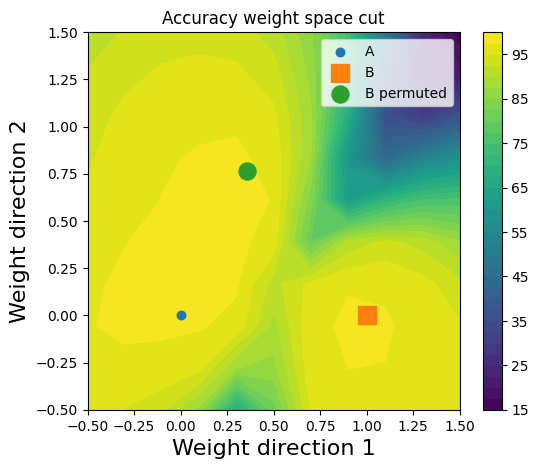

In [15]:
plot.plot_metric_contour(
    "accuracy",
    t1s,
    t2s,
    test_acc_grid,
    model_vectors_dict={
        "A": utils.projection(v1, contour_plane),
        "B": utils.projection(v2, contour_plane),
        "B permuted": utils.projection(v3, contour_plane),
    },
)


In [14]:
print(train_acc_naive)
print(test_acc_naive)
print(train_acc_perm)
print(test_acc_perm)

[99.57666666666667, 99.54166666666667, 99.51166666666667, 99.41333333333333, 99.23166666666667, 98.935, 98.31833333333333, 96.91166666666666, 93.94166666666666, 90.36666666666666, 91.08666666666667, 94.765, 97.12333333333333, 98.33166666666666, 98.94166666666666, 99.25833333333334, 99.425, 99.48166666666667, 99.49166666666666, 99.48666666666666]
[97.94, 97.97, 97.9, 97.91, 97.74, 97.45, 96.97, 95.75, 92.81, 89.43, 90.6, 93.71, 95.74, 96.82, 97.28, 97.52, 97.63, 97.79, 97.88, 97.93]
[99.57666666666667, 99.61666666666666, 99.65833333333333, 99.67166666666667, 99.69666666666667, 99.68333333333334, 99.67166666666667, 99.63666666666667, 99.61666666666666, 99.61, 99.59666666666666, 99.61333333333333, 99.63333333333334, 99.64333333333333, 99.64833333333333, 99.65666666666667, 99.65, 99.61, 99.55166666666666, 99.48666666666666]
[97.94, 98.08, 98.15, 98.19, 98.24, 98.26, 98.29, 98.27, 98.21, 98.21, 98.16, 98.17, 98.18, 98.15, 98.08, 98.08, 98.09, 98.08, 98.03, 97.93]
